#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [5]:
TDL4_Z3_1 = TDL_Class.TDL()
TDL4_Z3_1.initialize_TDL(9600,11200,1)

[ 9600  9601  9602  9603  9604  9605  9606  9607  9624  9625  9626  9627
  9628  9629  9630  9631  9648  9649  9650  9651  9652  9653  9654  9655
  9672  9673  9674  9675  9676  9677  9678  9679  9696  9697  9698  9699
  9700  9701  9702  9703  9720  9721  9722  9723  9724  9725  9726  9727
  9744  9745  9746  9747  9748  9749  9750  9751  9768  9769  9770  9771
  9772  9773  9774  9775  9792  9793  9794  9795  9796  9797  9798  9799
  9816  9817  9818  9819  9820  9821  9822  9823  9840  9841  9842  9843
  9844  9845  9846  9847  9864  9865  9866  9867  9868  9869  9870  9871
  9888  9889  9890  9891  9892  9893  9894  9895  9912  9913  9914  9915
  9916  9917  9918  9919  9936  9937  9938  9939  9940  9941  9942  9943
  9960  9961  9962  9963  9964  9965  9966  9967  9984  9985  9986  9987
  9988  9989  9990  9991 10008 10009 10010 10011 10012 10013 10014 10015
 10032 10033 10034 10035 10036 10037 10038 10039 10056 10057 10058 10059
 10060 10061 10062 10063 10080 10081 10082 10083 10

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR1.csv'.

There are 192 tapped bins and 197 untapped = 389 = 389

Tapped is: 49.36% 



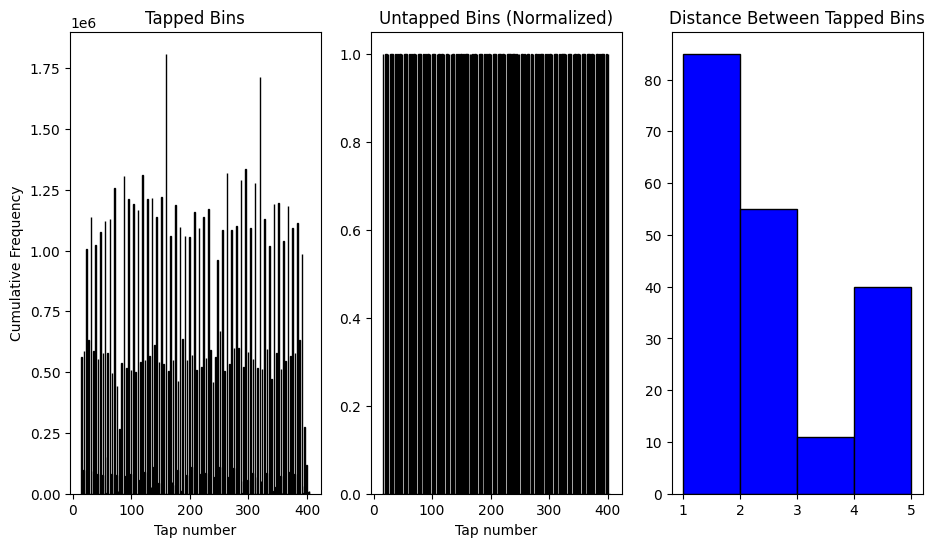

In [6]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [7]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL4_Z3_1.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL4_Z3_1.perform_POR()
to_print1 = TDL4_Z3_1.get_logical_assignments()
error_lib1 = TDL4_Z3_1.build_initial_error_lib()


Present taps: 
 [ 15  17  18  19  23  25  26  27  31  33  34  35  39  42  43  47  49  50
  51  55  57  58  59  63  66  67  71  73  74  75  77  79  81  82  83  87
  89  90  91  95  97  98  99 103 105 106 107 109 111 114 115 119 121 122
 123 127 129 130 131 133 135 137 138 139 143 146 147 151 154 155 159 162
 163 165 167 169 170 171 175 177 178 179 183 185 186 187 191 193 194 195
 199 201 202 203 207 209 210 211 215 217 218 219 223 225 226 227 231 234
 235 239 241 242 243 245 247 249 250 251 255 258 259 261 263 265 266 267
 271 273 274 275 279 282 283 287 289 290 291 295 297 298 299 303 305 306
 307 311 313 314 315 319 321 323 327 329 330 331 335 337 338 339 341 343
 346 347 351 353 354 355 357 359 361 362 363 367 369 370 371 375 377 378
 379 383 386 387 391 393 394 395 399 401 402 403] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'get_logical_assignments' in 'TD

##3) Results

In [8]:
# Show Results

print("POR result: \n")
for i,j in TDL4_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL4_Z3_1.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(4), np.int64(8)),):[2, 1, 8, 4, np.int64(3), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]

Logical bin assignment: 

{0: np.int64(9600), 1: np.int64(9601), 2: np.int64(9602), 3: np.int64(9603), 4: np.int64(9604), 5: np.int64(9605), 6: np.int64(9606), 7: np.int64(9607), 8: np.int64(9624), 9: np.int64(9625), 10: np.int64(9626), 11: np.int64(9627), 12: np.int64(9628), 13: np.int64(9629), 14: np.int64(9630), 15: np.int64(9631), 16: np.int64(9648), 17: np.int64(9649), 18: np.int64(9650), 19: np.int64(9651), 20: np.int64(9652), 21: np

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR2.csv'.

There are 358 tapped bins and 33 untapped = 391 = 391

Tapped is: 91.56% 



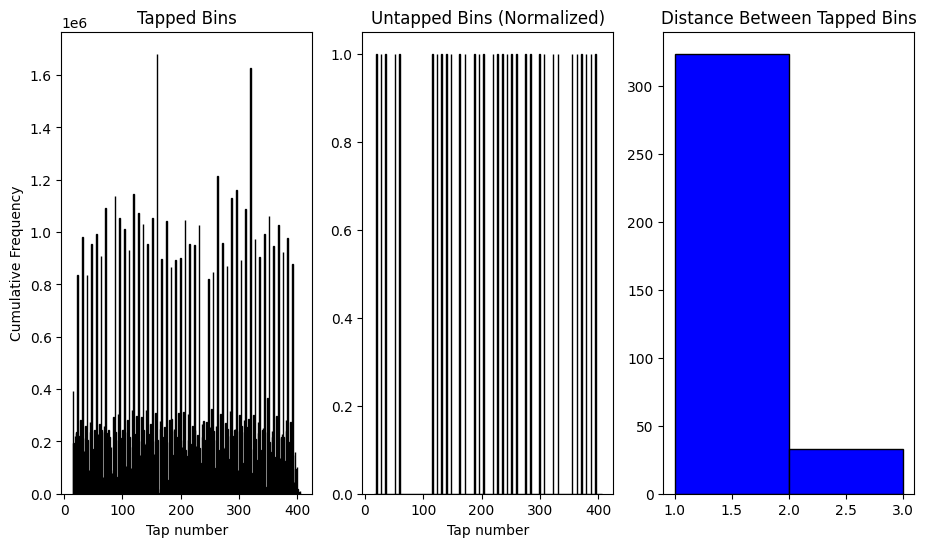

In [9]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [10]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL4_Z3_1.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL4_Z3_1.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL4_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  20  21  22  23  24  25  26  28  29  30  31  32  33  34
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54
  55  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 116 117 118 119 120 121 122 124 125 126 127 128 129
 130 132 133 134 135 136 137 138 140 141 142 143 144 145 146 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 163 164 165 166 167 168 169
 170 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188 189
 190 191 192 193 194 196 197 198 199 200 201 202 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 220 221 222 223 224 225 226 228 229
 230 231 232 233 234 236 237 238 239 240 241 242 244 245 246 247 248 249
 250 252 253 254 255 256 257 258 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 276 277 278 27

##3) Results

In [11]:
# Show Results

print("POR result: \n")
for i,j in TDL4_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL4_Z3_1.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(8),), (np.int64(8),)):(8,)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.in

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR3.csv'.

There are 390 tapped bins and 1 untapped = 391 = 391

Tapped is: 99.74% 



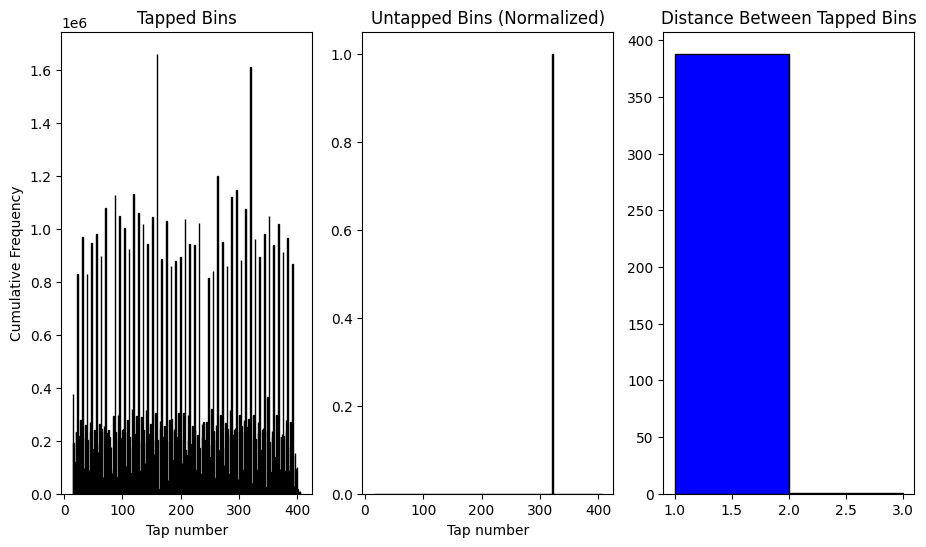

In [12]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_1_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL1_Z3_1.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL1_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 25

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [13]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL4_Z3_1.npz", cdc_to_pass = cdc_to_pass)

In [14]:
print(cdc_to_pass)

{np.int64(9649): np.float64(17.090314272534243), np.int64(9648): np.float64(8.774478154894313), np.int64(9650): np.float64(0.0008637326501965731), np.int64(9651): np.float64(4.572691569366994), np.int64(9655): np.float64(5.447516365176618), np.int64(9653): np.float64(10.520945573591783), np.int64(9654): np.float64(10.598408754430466), np.int64(9652): np.float64(1.1222160106711896), np.int64(9673): np.float64(37.65474310261178), np.int64(9672): np.float64(9.906877118915189), np.int64(9674): np.float64(0.0068644015884043435), np.int64(9675): np.float64(4.542915522741796), np.int64(9679): np.float64(3.405015945527564), np.int64(9677): np.float64(12.632817362935572), np.int64(9678): np.float64(11.430137836956597), np.int64(9676): np.float64(2.115372179557744), np.int64(9697): np.float64(44.08486900641992), np.int64(9696): np.float64(9.6492120314776), np.int64(9698): np.float64(0.003500390213954533), np.int64(9699): np.float64(4.4567695557879805), np.int64(9703): np.float64(2.97501346456917

In [15]:
print(to_print2)

{0: np.int64(9600), 1: np.int64(9601), 2: np.int64(9602), 3: np.int64(9603), 4: np.int64(9604), 5: np.int64(9605), 6: np.int64(9606), 7: np.int64(9607), 8: np.int64(9624), 9: np.int64(9625), 10: np.int64(9626), 11: np.int64(9627), 12: np.int64(9628), 13: np.int64(9629), 14: np.int64(9630), 15: np.int64(9631), 16: np.int64(9649), 17: np.int64(9648), 18: np.int64(9650), 19: np.int64(9651), 20: np.int64(9655), 21: np.int64(9653), 22: np.int64(9654), 23: np.int64(9652), 24: np.int64(9673), 25: np.int64(9672), 26: np.int64(9674), 27: np.int64(9675), 28: np.int64(9679), 29: np.int64(9677), 30: np.int64(9678), 31: np.int64(9676), 32: np.int64(9697), 33: np.int64(9696), 34: np.int64(9698), 35: np.int64(9699), 36: np.int64(9703), 37: np.int64(9701), 38: np.int64(9702), 39: np.int64(9700), 40: np.int64(9721), 41: np.int64(9722), 42: np.int64(9720), 43: np.int64(9727), 44: np.int64(9723), 45: np.int64(9725), 46: np.int64(9726), 47: np.int64(9724), 48: np.int64(9745), 49: np.int64(9744), 50: np.in

In [16]:
print(bin3)
print(present_taps3)
print(freq3)

[ 15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 1)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_25_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_25_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_25_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print3

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL4_Z3_1.logical_assignment, TDL_start = TDL4_Z3_1.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 4, Ending Cell num: 151
4:[np.int64(8)]
7:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
10:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
13:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
16:[np.int64(3), np.int64(4), np.int64(8)]
19:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
22:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
25:[np.int64(3), np.int64(4), np.int64(8)]
28:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
31:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
34:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
37:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
40:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
43:[np.int64(3), np.int64(4), np.int64(8)]
46:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
49:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
52:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
55:[np.int64(3), np.int64(4), np.int64(8)]
58:

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL4_Z3_1.logical_assignment, TDL_start = TDL4_Z3_1.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 4. Ending Cell num 151
4:[np.int64(8)]
7:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
10:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
34:[np.int64(1), np.int64(2), np.int

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL4_Z3_1.logical_assignment, TDL_start = TDL4_Z3_1.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 4, Ending Cell num: 151
4:[np.int64(8)]
7:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
10:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(

In [ ]:
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

(np.int64(2), np.int64(3), np.int64(4), np.int64(8)):[2, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

17.090314272534243
8.774478154894313
0.000863732650196573
4.572691569366994
5.447516365176617
10.520945573591783
10.598408754430466
1.1222160106711896
37.654743102611775
9.906877118915189
0.006864401588404344
4.542915522741796
3.405015945527564
12.632817362935572
11.430137836956598
2.115372179557744
44.08486900641992
9.649212031477601
0.003500390213954533
4.45676955578798
2.9750134645691753
11.717124374887701
10.633003520051497
2.274071689128072
37.77021052005911
9.151338348059028
1.300008557772179
4.126414546894376
0.016320001127398405
12.31791862251917
10.568587248192099
2.9398731835901253
43.00324843030797
7.718314962156577
2.118963488998035
3.5523050921926638
3.525893056941916
10.983224379899625
10.427935205049563
2.282027121432514
44.59878993328688
8.585911679472451
0.14688001014658567
7.1204301297678745
3.2428615053564496
11.937512579527331
11.169745172728915
0.9161930437927228
40.888967281466265
11.038139592606859
1.2552762984146302
2.9153249924792752
0.976290652401137
11.683029

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

40

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>